**Multivariate Linear regression using gradient descent algorithm**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

In [ ]:
weatherHistoryDataSet = pd.read_csv('sample_data/weatherHistory.csv')

In [ ]:
weatherHistoryDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
weatherHistoryDataSet.head(1)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.


In [ ]:
print(pd.unique(weatherHistoryDataSet['Precip Type']))

['rain' 'snow' nan]


In [ ]:
weatherHistoryDataSet.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [ ]:
weatherHistoryDataSet = weatherHistoryDataSet[['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 
                       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']]

**removing all the nan values**

In [ ]:
weatherHistoryDataSet.dropna(inplace=True)

In [ ]:
weatherHistoryDataSet['Precip Type'] = weatherHistoryDataSet['Precip Type'].apply(lambda value : 1 if value == 'rain' else 0)

In [ ]:
weatherHistoryDataSet.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [ ]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

Normalizing all the columns

In [ ]:
# call the z_score function
weatherHistoryDataSetStandardized = z_score(weatherHistoryDataSet)
weatherHistoryDataSetStandardized.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,0.354529,-0.257950,-0.324100,0.792744,0.478962,0.591154,1.309101,NaN,0.102151
1,0.354529,-0.270140,-0.339132,0.639467,0.499899,0.665652,1.309101,NaN,0.106414
2,0.354529,-0.267818,-0.138531,0.792744,-0.993615,0.153477,1.100800,NaN,0.109058
3,0.354529,-0.381592,-0.458870,0.486190,0.476635,0.758774,1.309101,NaN,0.113065
4,0.354529,-0.332831,-0.362458,0.486190,0.034630,0.665652,1.309101,NaN,0.113918


In [ ]:
weatherHistoryDataSetStandardized.drop(columns=['Loud Cover'], inplace=True)

In [ ]:
weatherHistoryDataSetStandardized.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.354529,-0.257950,-0.324100,0.792744,0.478962,0.591154,1.309101,0.102151
1,0.354529,-0.270140,-0.339132,0.639467,0.499899,0.665652,1.309101,0.106414
2,0.354529,-0.267818,-0.138531,0.792744,-0.993615,0.153477,1.100800,0.109058
3,0.354529,-0.381592,-0.458870,0.486190,0.476635,0.758774,1.309101,0.113065
4,0.354529,-0.332831,-0.362458,0.486190,0.034630,0.665652,1.309101,0.113918


In [ ]:
import numpy as np

In [ ]:
weatherHistoryDataSetStandardized.shape

(95936, 8)

In [ ]:
weatherHistoryDataSetStandardized.columns

Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [ ]:
Xd = weatherHistoryDataSetStandardized.drop(columns=['Temperature (C)'])
Xd.insert(loc=0, column='X0', value=1)
Xd.head()

,X0,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,1,0.354529,-0.324100,0.792744,0.478962,0.591154,1.309101,0.102151
1,1,0.354529,-0.339132,0.639467,0.499899,0.665652,1.309101,0.106414
2,1,0.354529,-0.138531,0.792744,-0.993615,0.153477,1.100800,0.109058
3,1,0.354529,-0.458870,0.486190,0.476635,0.758774,1.309101,0.113065
4,1,0.354529,-0.362458,0.486190,0.034630,0.665652,1.309101,0.113918


In [ ]:
X = Xd.values
Y = weatherHistoryDataSetStandardized['Temperature (C)'].values

In [ ]:
train_X = X[1000:3000]
train_Y = Y[1000:3000]
test_X = X[3000:8000]
test_Y = Y[3000:8000]

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(2000, 8)
(2000,)
(5000, 8)
(5000,)


In [ ]:
train_Y = train_Y.reshape(train_X.shape[0], 1)
test_Y = test_Y.reshape(test_Y.shape[0], 1)

In [ ]:
m = train_X.shape[0]
n = train_X.shape[1]

In [ ]:
theta = np.zeros(n).reshape(n, 1)

In [ ]:
theta.shape

(8, 1)

In [ ]:
hThetaX = train_X@theta

In [ ]:
hThetaX.shape

(2000, 1)

In [ ]:
jTheta = (1/(2*m))*(np.transpose(train_X@theta-train_Y)@(train_X@theta-train_Y))

In [ ]:
jTheta

array([[0.65377527]])

In [ ]:
# partial derivative of jTheta wrt theta[j] list
# theta[j][0] += alpha * (1/m)*np.transpose(X[:, j])*(hThetaX-Y)

# vectorized implementation
# theta -= alpha * (1/m) * np.transpose(train_X) @ (train_X@theta-train_Y)

In [ ]:
%%time
# gradient descent X, Y, theta, alpha, epoch
alpha = 0.0005
epoch = 10000

listOfJTheta = []

for _ in range(epoch):

  jTheta = (1/(2*m))*(np.transpose(train_X@theta-train_Y)@(train_X@theta-train_Y))

  theta = theta - alpha * (1/m) * np.transpose(train_X) @ (train_X@theta-train_Y)

  listOfJTheta.append(jTheta)

CPU times: user 931 ms, sys: 723 ms, total: 1.65 s
Wall time: 874 ms


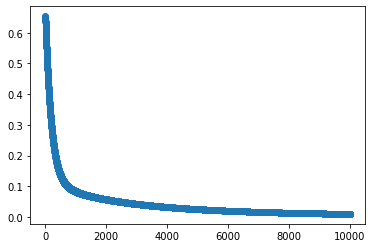

In [ ]:
plt.scatter(x=range(epoch), y=listOfJTheta)
plt.show()

In [ ]:
def testMultivariateLR(test_X, test_Y, theta):
  predicted_Y = test_X@theta
  
  result = np.sum(np.abs((predicted_Y - test_Y)/test_Y))
  result /= test_Y.shape[0]
  result *= 100
  accuracy = 100 - result

  return accuracy

In [ ]:
accuracy = testMultivariateLR(test_X, test_Y, theta)

In [ ]:
print(accuracy)

63.39330939705699


In [ ]:
# line_X = test_X[:, 1:2]
# line_Y = test_Y[:,:]
# b0 = theta[0:1, :]
# b1 = theta[1:2, :]
# plt.scatter(x=line_X, y=line_Y, color='#1f77b4')
# plt.plot(line_X,b0+b1*line_X, 'r')
# plt.xlabel('Precip Type')
# plt.ylabel('Temprature (C)')